In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1, 1)


In [9]:
def kernel(a, b, param):
    sqdist = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param)*sqdist)

In [10]:
param = 0.1
K_ss = kernel(Xtest, Xtest, param)

In [23]:
# Cholesky decomposition (sqrt) of the covariance matrix:

L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))

# Sample 3 sets of standard normals and multiply by the cholesky decomposition
f_prior = np.dot(L, np.random.normal(size=(n,3)))

[-5, 5, -3, 3]

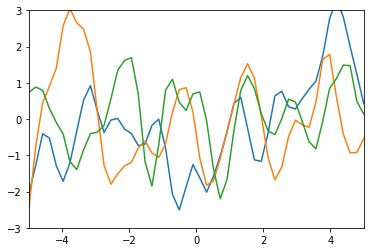

In [27]:
plt.plot(Xtest, f_prior)
plt.axis([-5, 5, -3, 3])

In [29]:
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

In [35]:
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape(n,)

In [40]:
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

In [41]:
L = np.linalg.cholesky(K_ss + 1e-16*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1, 1) + np.dot(L, np.random.normal(size=(n,3)))

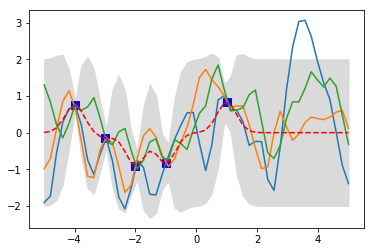

In [55]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, f_post)
plt.fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color='#dadada')
plt.plot(Xtest, mu, 'r--')